
##  <u>  Insurance Cross Selling <u> 



###  <u>  Data Dictionary <u>
The dataset is from Kaggle.com: 
https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction 
Unique ID Rows: 381109 values Data Features are as follows: 
Attributes Count: There are 11 Attributes attached to each unique identifier. One is a Target Variable. Please find the included details below. 


###  <u>  Introduction <u>
This project is focused on Vehicle Insurance cross sales by a health insurance company. <br>
The Health Insurance company guarantees compensation for damage to a person’s health, loss of life and any property loss incurred. They are now aimed at leveraging their repository of customer and prospect data to cross sell a vehicle insurance product. <br>
<br>
This is a continuous cycle that allows the company to follow the customer from more avenues. How to design a product that will win over most customers in this area is the business problem that we are trying to address. The case provides some data that has been generated from their beta market tests to develop an understanding of their customer responsiveness to the new vehicle insurance product based on certain identifying demographics. <br>
<br>
This case is being approached as a predictive analytics data mining problem. The steps we will follow to classify customers into viable candidates for cross-selling are based on the positive, or negative responses generated by their existing customers. A host of supervised and unsupervised classification algorithms will be trained on the data provided in this case study, treating their logged responses to the new vehicle insurance product as the target variable (yes/no to purchasing the product). The report below details the attributes of the dataset, feature engineering and data munging applied to the dataset and classification algorithms used in generating predictions to classify customers based on their responses. 


Variable|Variable Description
:-----|:-----
ID|Unique ID for the customer
Gender|Gender of the customer
Age|Age of the customer
Driving License|0 for Customer that does not have a Driver’s License, <br>1 for Customer already has Driver’s License
Region Code|Unique code for the region of the customer
Previously Insured|1 for Customer already has previously opted for Vehicle Insurance, 0 for Customer that doesn't have pre-existing Vehicle Insurance coverage
Vehicle Age|Age of the Vehicle
Vehicle Damage|1 for Customer that damaged their vehicle in the past. 0 for Customer that did not damage their vehicle in the past.
Annual Premium|The amount customer would need to pay as premium in the year
Policy Sales Channel|Anonymized Code for the outbound sales channel connecting to the customer <br> i.e. Different Agents, Over Mail, Over Phone, In Person, etc.
Vintage |Number of Days, Customer has been associated with the company
Response|Target Variable. <br> 1 if the Customer shows a positive response to purchasing the insurance product, <br>0 for Customers who are not interested in purchasing this product


 ## <u> Exploratory Data Analysis [EDA] <u>

### To analyze the variables, some of the important libraries used in our project are numpy, pandas, matlotlib, seaborn sklearn.
### To know the dataset better, we need to know the relationship of variables with the target variable. 
### Eliminating / dumping unnecessary variables is an important part of data cleaning. 
### As part of our analysis, 'ID' does not play much significant role for better performance of algorithms in training and testing data set. 
<br>
<br>
<br>




In [1]:
import numpy as np
import pandas as pd

# Packages for Ploting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import accuracy_score  

# Importing the ML Algorithm Packages
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing the Matrics and Other Required Packages
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300)
sns.set()

In [2]:
# Reading the Data from CSV File
df = pd.read_csv('train.csv')

# Copying the Main Data from csv to a New Varable DF1
df1 = df.copy()

df1 = df.drop(['id'],axis = 1)

In [3]:
# To Know the Type of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
# To get the Total Rows and Columns
df.shape

(381109, 12)

There are 381109 Rows and 12 Columns in the dataset

In [5]:
# Seeing if there are any Null Values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
df_train = pd.read_csv('train.csv')
df1 = df_train.copy()
df1.Gender = df1.Gender.apply(lambda x: int(1) if x == 'Male' else int(0))
df1.Vehicle_Damage = df1.Vehicle_Damage.apply(lambda x: int(1) if x == 'Yes' else int(0))
df1.Vehicle_Age = df1.Vehicle_Damage.apply(lambda x: int(0) if x == 1.0 else (int(1) if x==1.5 else int(2)))
df1['Policy_Sales_Channel'] = df1['Policy_Sales_Channel'].astype(int)
df1['Region_Code'] = df1['Region_Code'].astype(int)  
df1['Response'] = df1['Response'].astype(int)
df1['Vehicle_Age'] = df1['Vehicle_Age'].astype(int)

In [7]:
df1.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,0.990247,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.999954,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,0.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,2.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  int32  
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int32  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  int32  
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int32  
dtypes: float64(1), int32(4), int64(7)
memory usage: 29.1 MB


## <u> Target Variable <u>

Percentage of target class

0    87.743664
1    12.256336
Name: Response, dtype: float64


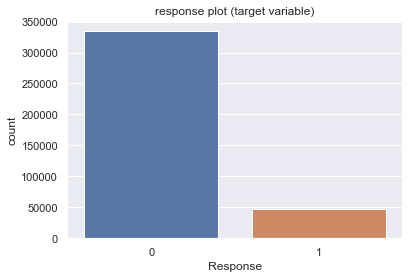

In [9]:
plt.plot
sns.countplot(df1['Response'])
plt.title("response plot (target variable)")

print( "Percentage of target class\n")
print(df1['Response'].value_counts()/len(df1)*100)

### The target variable is disproportionate and will affect the accuracy of the classification algorithm. 
### The target variable needs to be rebalanced before we can proceed with our machine learning algorithm. 

In [10]:
# DataFrame With All 1s in Response
df_once = df1[df1['Response'] == 1]

# DataFrame With All 0s Response
df_zeros = df1[df1['Response'] == 0]

# Takeing a random sample from df_zeros(0s) to a length of df_once(1s)
Zero_Resampling = df_zeros.sample(n = len(df_once))

# Concat(joining) df_once and Zero_Resampling
New_df = pd.concat([df_once,Zero_Resampling])

# Shuffleing the New_df
final_df = shuffle(New_df)


In [11]:
Responses_count = [len(final_df[final_df.Response == 1]),len(final_df[final_df.Response == 0])]
Responses_count

[46710, 46710]

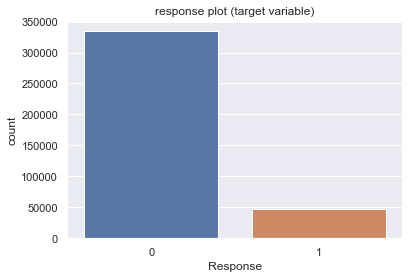

In [12]:

sns.countplot(df1['Response'])
plt.title("response plot (target variable)")
plt.show()


## <u> Gender Variable <u> 

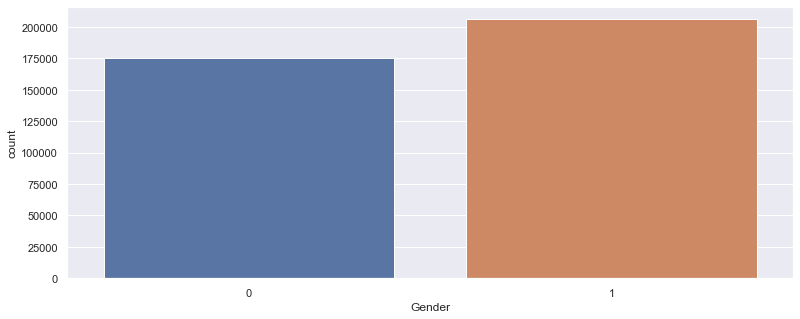

In [13]:
plt.figure(figsize = (13,5))
sns.countplot(df1['Gender'])
plt.show()

In [1]:
plt.figure(figsize=(13,5))
sns.countplot(final_df['Gender'], hue = final_df['Response'])
plt.title("Male and female responses")
plt.show()

NameError: name 'plt' is not defined

## <u> Annual Premium Variable <u>

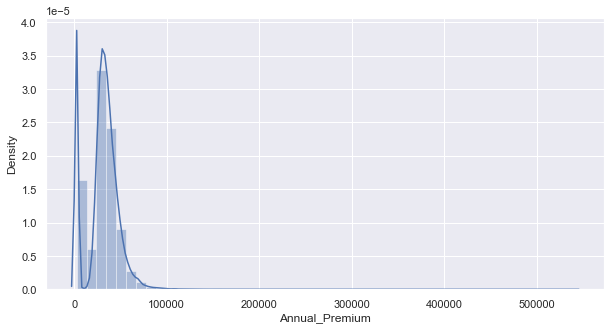

In [15]:
# Ploting a Distibution Plot for Annual_Premium
plt.figure(figsize=(10,5))
Annual_Premium_plot = sns.distplot(final_df.Annual_Premium)

<AxesSubplot:xlabel='Annual_Premium'>

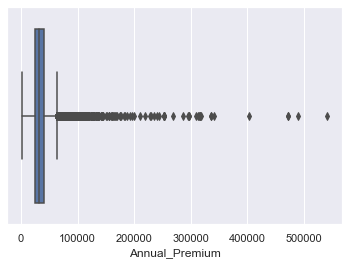

In [16]:
sns.boxplot(final_df['Annual_Premium'])

### We are performing a log transform on Annual_premium since to remove the skewness and for better distribution

In [17]:
final_df['Log_Annual_Premium'] = np.log(final_df['Annual_Premium'])
final_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Log_Annual_Premium
156779,156780,1,60,1,28,0,0,1,61102.0,26,179,0,11.020300
340837,340838,0,42,1,28,0,0,1,51156.0,26,98,1,10.842635
304223,304224,1,21,1,26,0,0,1,32070.0,160,232,0,10.375676
290603,290604,1,31,1,3,0,0,1,31991.0,154,151,1,10.373210
4946,4947,1,46,1,28,0,0,1,50227.0,26,162,1,10.824308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251253,251254,0,26,1,8,1,2,0,26376.0,152,179,0,10.180210
21641,21642,0,28,1,41,0,0,1,2630.0,156,155,0,7.874739
351757,351758,1,22,1,9,0,2,0,36714.0,152,55,0,10.510913
342558,342559,1,36,1,13,0,0,1,36098.0,124,108,1,10.493993


<AxesSubplot:xlabel='Log_Annual_Premium'>

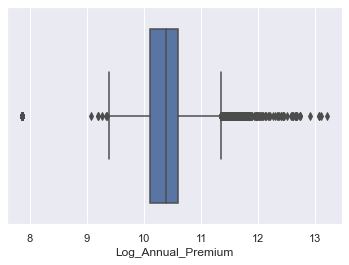

In [18]:
sns.boxplot(final_df['Log_Annual_Premium'])

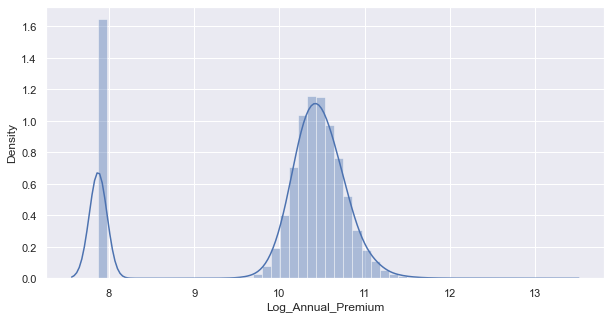

In [19]:
# Ploting a Distibution Plot for Annual_Premium
plt.figure(figsize=(10,5))
Annual_Premium_plot = sns.distplot(final_df.Log_Annual_Premium)

### We will examine the highest correlated attributes and eliminate attributes that are not contributing more to the information gain

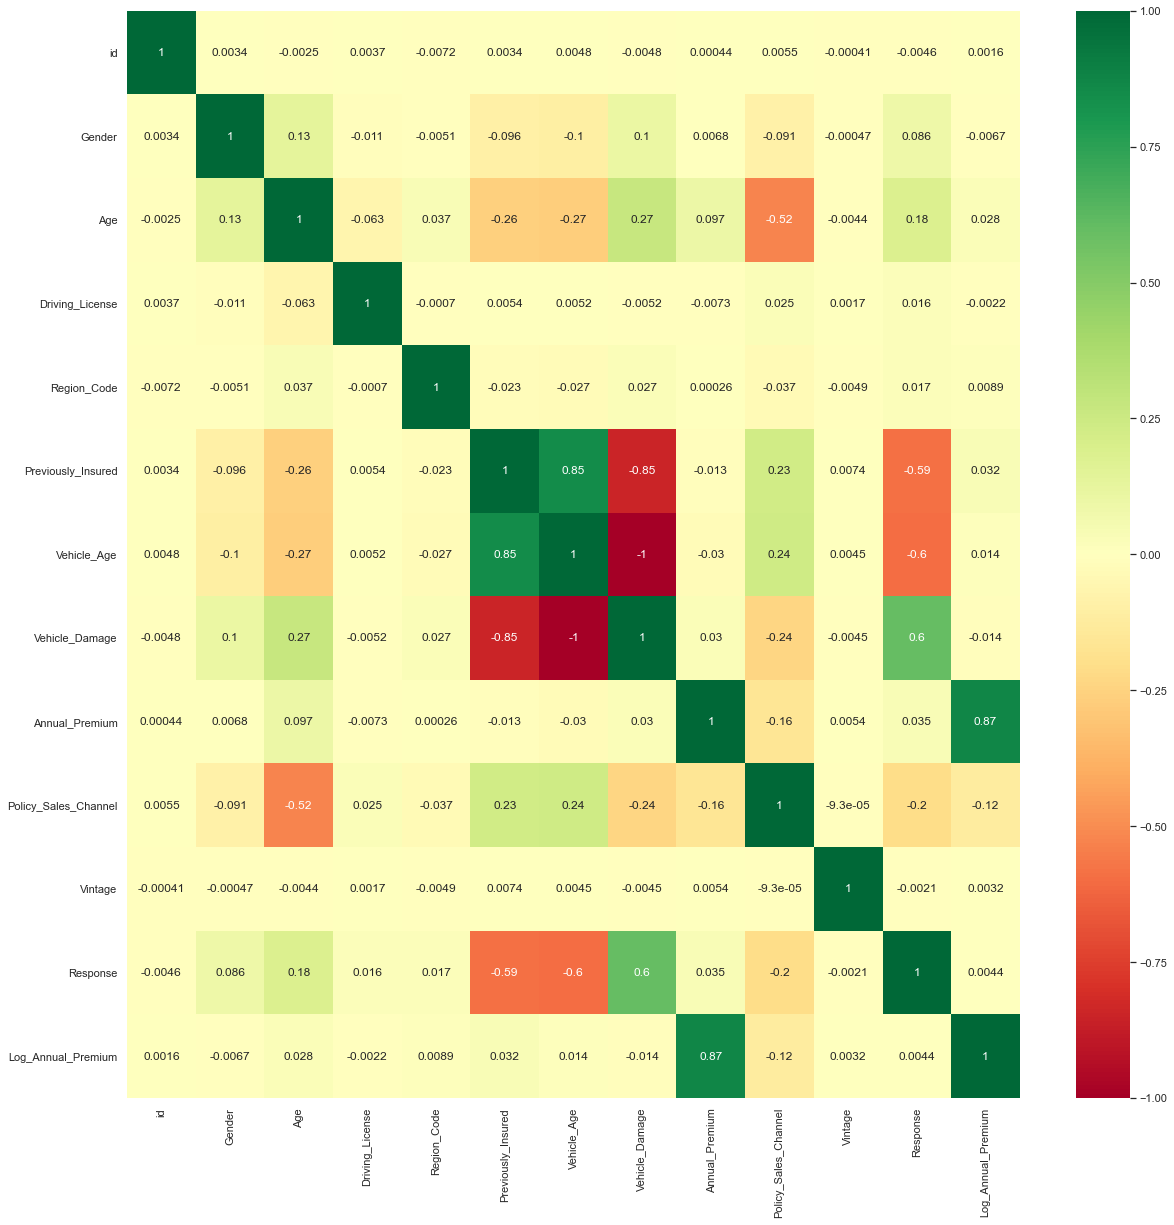

In [20]:
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [22]:
correlation(final_df, 0.6)

{'Log_Annual_Premium', 'Vehicle_Age', 'Vehicle_Damage'}

In [23]:
final_df = final_df.drop(['Vehicle_Damage'],axis = 1)

In [24]:
final_df = final_df.drop(['Annual_Premium'],axis = 1)

### We are removing Vehicle damage because it is highly correlated with two other attributes(vehicle_age and previously_insured) to avoid multicollinearity


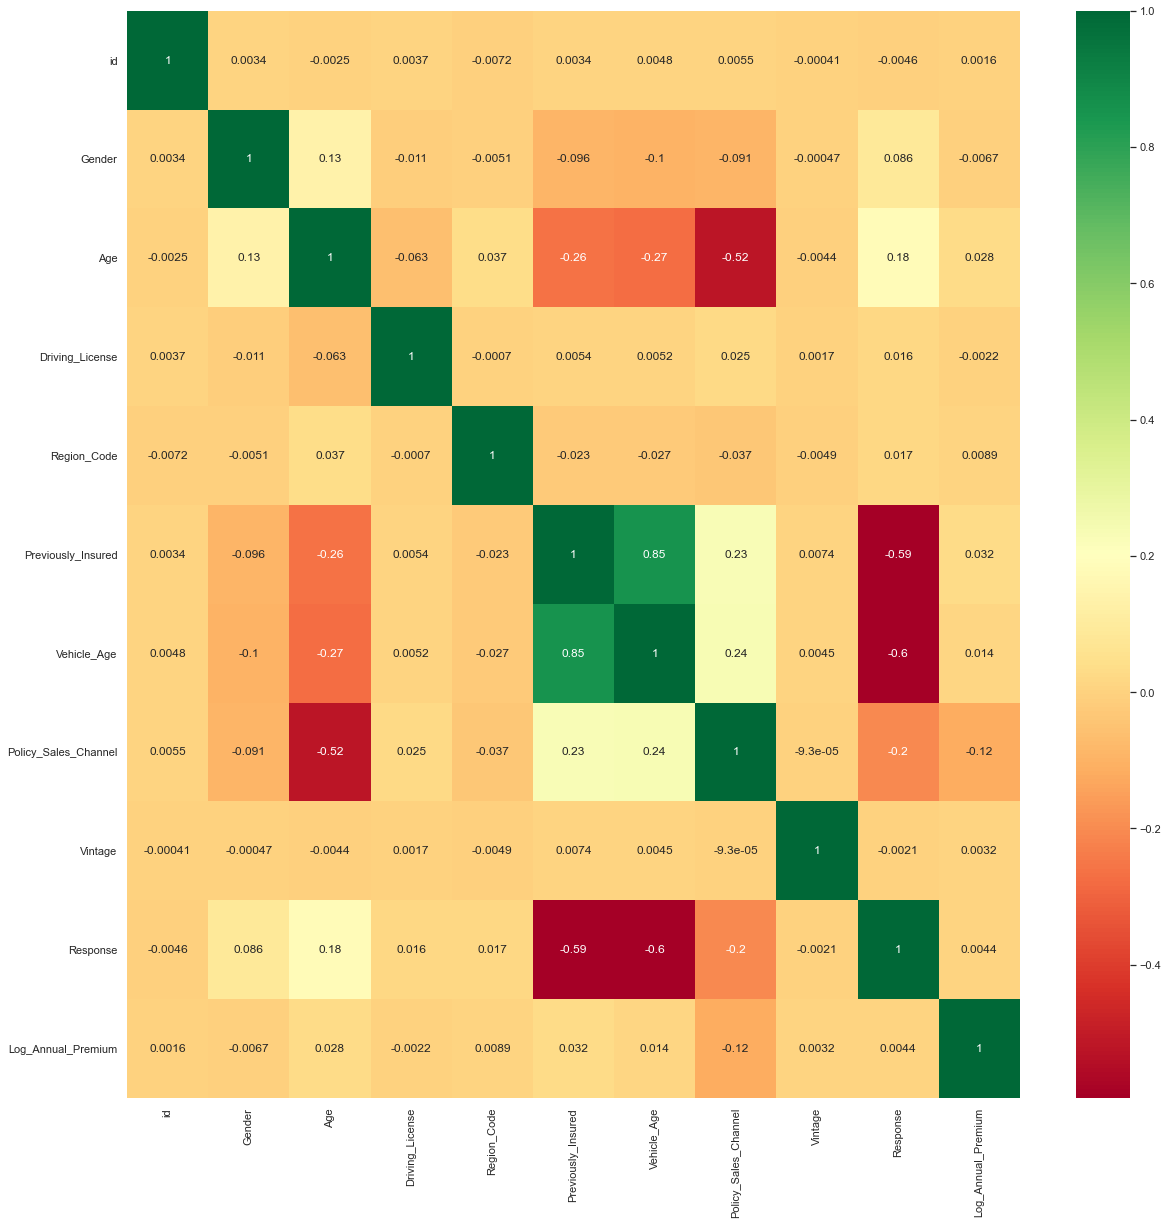

In [25]:
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
final_df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Policy_Sales_Channel,Vintage,Response,Log_Annual_Premium
156779,156780,1,60,1,28,0,0,26,179,0,11.020300
340837,340838,0,42,1,28,0,0,26,98,1,10.842635
304223,304224,1,21,1,26,0,0,160,232,0,10.375676
290603,290604,1,31,1,3,0,0,154,151,1,10.373210
4946,4947,1,46,1,28,0,0,26,162,1,10.824308
7516,7517,0,26,1,32,0,0,160,19,0,10.376393
132203,132204,0,21,1,32,0,0,160,49,1,10.259972
166303,166304,0,49,1,28,0,0,157,153,1,10.101928
205813,205814,0,25,1,28,0,0,160,50,0,10.294719
52602,52603,0,52,1,38,0,2,124,207,1,10.542522


## <u> Previously Insured Variable <u>

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

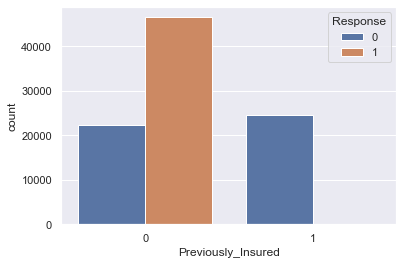

In [27]:
sns.countplot('Previously_Insured', hue = 'Response',data = final_df)

### Train:Validate is 70:30 split

In [28]:
y = final_df.Response
X = final_df.drop(['Response'],axis = 1,inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [29]:
pipeline = {
    'LogisticRegression': make_pipeline(StandardScaler(), LogisticRegression()),
    'RidgeClassifier': make_pipeline(StandardScaler(), RidgeClassifier()),
    'DecisionTreeClassifier': make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=0)),
    'RandomForestClassifier': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'GradientBoostingClassifier': make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'XGBClassifier': make_pipeline(StandardScaler(), XGBClassifier(verbosity=0)),
}

In [30]:
fit_model = {}
for algo,pipelines in pipeline.items():
    model = pipelines.fit(X_train,y_train)
    fit_model[algo] = model
    score = []
    names = []
    dds = []
    for algo,model in fit_model.items():
        yhat = model.predict(X_test)
        names.append(algo)
        score.append(accuracy_score(y_test, yhat))
result= pd.DataFrame(names,columns = ['Name'])
result['Score'] = score
result

,Name,Score
0,LogisticRegression,0.785449
1,RidgeClassifier,0.785414
2,DecisionTreeClassifier,0.713694
3,RandomForestClassifier,0.789909
4,GradientBoostingClassifier,0.796582
5,XGBClassifier,0.794619


In [31]:
for names,value in pipeline.items():
    model = value.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(" ")
    print(names)
    print('-'*len(names))
    print(' ')
    print(classification_report(y_test, preds))
    print(' ')
    print('_'*55)

 
LogisticRegression
------------------
 
              precision    recall  f1-score   support

           0       0.96      0.60      0.74     14035
           1       0.71      0.98      0.82     13991

    accuracy                           0.79     28026
   macro avg       0.83      0.79      0.78     28026
weighted avg       0.83      0.79      0.78     28026

 
_______________________________________________________
 
RidgeClassifier
---------------
 
              precision    recall  f1-score   support

           0       0.96      0.59      0.74     14035
           1       0.71      0.98      0.82     13991

    accuracy                           0.79     28026
   macro avg       0.83      0.79      0.78     28026
weighted avg       0.83      0.79      0.78     28026

 
_______________________________________________________
 
DecisionTreeClassifier
----------------------
 
              precision    recall  f1-score   support

           0       0.71      0.72      0.72    

### XGBoost has the highest Classification Accuracy score among the classifiers listed above.